## Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import weightedstats as ws
import matplotlib.pyplot as plt

## 1.0 Leitura de Dados

In [2]:
df = pd.read_csv('dados/state.csv')
df.columns = ['Estado', 'População', 'Taxa de Homicídio', 'UF']

## 1.1 Dimensões

In [3]:
print("A base de dados possui %d linhas e %d colunas" % (df.shape))

A base de dados possui 50 linhas e 4 colunas


## 1.2 Tipo de Dados

In [4]:
print("O tipo de dados em cada coluna da base estão listados a seguir:")
df.dtypes

O tipo de dados em cada coluna da base estão listados a seguir:


Estado                object
População              int64
Taxa de Homicídio    float64
UF                    object
dtype: object

## 2.0 Medidas de tendência central

Essa seção contém exemplos de 6 medidas de tendência central.

(1) Média
(2) Média truncada
(2) Média ponderada
(3) Mediana
(4) Mediana ponderada
(5) Moda

## 2.1 Medidas de tendência central

In [5]:
coluna = "População"

print("Coluna:", coluna)
print("-- -- --")
print("Média: %.2f" % np.mean(df[coluna])) # .mean() no pandas
print("Média aparada: %.2f" % stats.trim_mean(df[coluna], proportiontocut=0.1))
print("Mediana: %.2f" % np.median(df[coluna])) # .median() no pandas

Coluna: População
-- -- --
Média: 6162876.30
Média aparada: 4783697.12
Mediana: 4436369.50


In [6]:
coluna = "Taxa de Homicídio"

print("Coluna:", coluna)
print("-- -- --")
print("Média: %.2f" % np.mean(df[coluna]))
print("Média aparada: %.2f" % stats.trim_mean(df[coluna], proportiontocut=0.1))
print("Mediana: %.2f" % np.median(df[coluna]))
print("-- -- --")
print("-- Ponderada pela coluna População")
print("-- -- --")
print("Média Ponderada: %.2f" % np.average(df[coluna], weights = df['População']))
print("Mediana Ponderada: %.2f" % ws.weighted_median(df[coluna], weights = df['População']))
print("-- -- --")

Coluna: Taxa de Homicídio
-- -- --
Média: 4.07
Média aparada: 3.95
Mediana: 4.00
-- -- --
-- Ponderada pela coluna População
-- -- --
Média Ponderada: 4.45
Mediana Ponderada: 4.40
-- -- --


In [7]:
df['TH_Arrend'] = round(df['Taxa de Homicídio'], 0)
print("Moda:", stats.mode((df['TH_Arrend']))[0][0])
print("Contagem:", stats.mode((df['TH_Arrend']))[1][0])

Moda: 2.0
Contagem: 13


## 2.2 Visualização de distruição de dados

Distribuição e dados da coluna: População


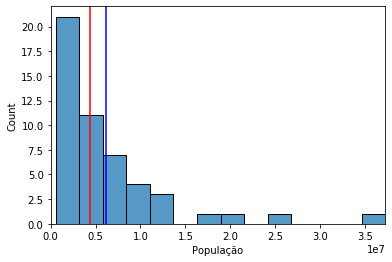

In [8]:
coluna = "População"

ax = sns.histplot(df[coluna])

ax.axvline(np.mean(df[coluna]), 0, 1.6, color='b')
ax.axvline(np.median(df[coluna]), 0, 1.6, color='r')
plt.xlim(0, df[coluna].max())

print("Distribuição e dados da coluna:", coluna)

Distribuição e dados da coluna: Taxa de Homicídio


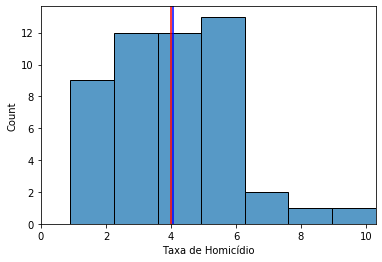

In [9]:
coluna = "Taxa de Homicídio"

ax = sns.histplot(df[coluna])

ax.axvline(np.mean(df[coluna]), 0, 1.6, color='b')
ax.axvline(np.median(df[coluna]), 0, 1.6, color='r')
plt.xlim(0, df[coluna].max())

print("Distribuição e dados da coluna:", coluna)

## 3.0 Medidas de dispersão

Essa seção contém exemplos de 6 medidas de dispersão:

(1) Amplitude (2) Variância (3) Desvio Padrão (4) Desvio Médio Absoluto (5) Desvio Mediano Absoluto (6) Amplitude interquartílica

In [10]:
df_disp = pd.read_csv('dados/state.csv')
df_disp.columns = ['Estado', 'População', 'Taxa de Homicídio', 'UF']

In [11]:
coluna = "População"

print("Coluna:", coluna)
print("-- -- --")
print("Amplitude: %.2f" % (np.max(df[coluna])-np.min(df_disp[coluna]))) # .min() .max() no pandas
print("Variância: %.2f" % np.var(df_disp[coluna])) # .var() no pandas
print("Desvio Padrão: %.2f" % np.std(df_disp[coluna], ddof=1)) # .std() no pandas tem ddof=1 por padrão
print("Desvio Médio Absoluto: %.2f" % (df_disp[coluna].mad()))
print("Desvio Mediano Absoluto: %.2f" % stats.median_abs_deviation(df_disp[coluna], scale='normal'))
print("Amplitude interquartílica: %.2f" % (np.percentile(df_disp[coluna],75)-np.percentile(df_disp[coluna],25)))

Coluna: População
-- -- --
Amplitude: 36690330.00
Variância: 45960360825926.56
Desvio Padrão: 6848235.35
Desvio Médio Absoluto: 4450933.36
Desvio Mediano Absoluto: 3849876.15
Amplitude interquartílica: 4847308.00


O desvio padrão pode ser comparado ao desvio mediano absoluto. Observe que o desvio mediano absoluto é menor que o desvio padrão. Isso ocorre porque o desvio padrão é sensível a outliers.

## 4.0 Distribuição de Dados

(1) Boxplot (2) Tabela de Frequências (3) Histograma (4) Gráfico de Densidade

### 4.0 Leitura de dados

In [25]:
df_distrib = pd.read_csv('dados/state.csv')
df_distrib.columns = ['Estado', 'População', 'Taxa de Homicídio', 'UF']
df_distrib.head()

,Estado,População,Taxa de Homicídio,UF
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


### 4.1 Percentil

In [13]:
np.quantile(df_distrib['Taxa de Homicídio'], q=[0.05, 0.25, 0.5, 0.75, 0.95])

array([1.6  , 2.425, 4.   , 5.55 , 6.51 ])

### 4.2 Boxplot

BoxPlot da população (em milhões)


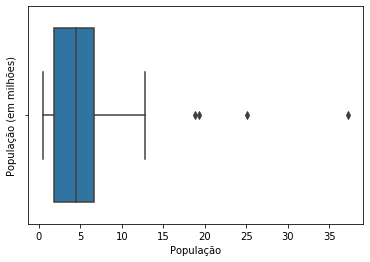

In [14]:
ax = sns.boxplot(x = df_distrib['População']/1e6)
ax.set_ylabel('População (em milhões)')
print("BoxPlot da população (em milhões)")

### 4.3 Tabela de Frequência

In [15]:
pd.set_option('display.max_colwidth', 100)
#--
bins = pd.cut(df_distrib['População'], 10)
df_ft = pd.merge(df_distrib, bins, how='inner', left_index=True, right_index=True)
df_ft.rename(columns={'População_y':'Intervalo'}, inplace=True)
df_ft
df_ft.groupby('Intervalo').agg({'Intervalo': 'count', 'UF': ' '.join}).rename(columns={'Intervalo':'Frequência', 'UF':'Lista de UFs'})

,Frequência,Lista de UFs
Intervalo,,
"(526935.67, 4232659.0]",24,AK AR CT DE HI ID IA KS ME MS MT NE NV NH NM ND OK OR RI SD UT VT WV WY
"(4232659.0, 7901692.0]",14,AL AZ CO IN KY LA MD MA MN MO SC TN WA WI
"(7901692.0, 11570725.0]",6,GA MI NJ NC OH VA
"(11570725.0, 15239758.0]",2,IL PA
"(15239758.0, 18908791.0]",1,FL
"(18908791.0, 22577824.0]",1,NY
"(22577824.0, 26246857.0]",1,TX
"(26246857.0, 29915890.0]",0,None
"(29915890.0, 33584923.0]",0,None


### 4.4 Histograma

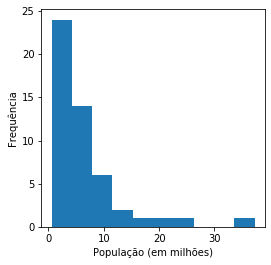

In [24]:
ax = (df_distrib['População']/1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel('População (em milhões)');
ax.set_ylabel('Frequência');

### 4.5 Gráfico de Densidade

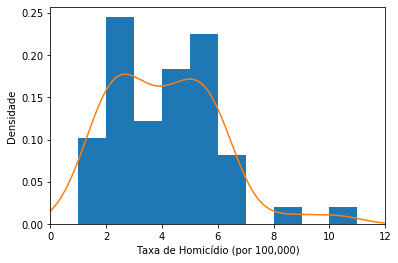

In [28]:
ax = df_distrib['Taxa de Homicídio'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
df_distrib['Taxa de Homicídio'].plot.density(ax=ax)
ax.set_xlabel('Taxa de Homicídio (por 100,000)')
ax.set_ylabel('Densidade');

## 5.0 Dados binários e Categóricos